# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree

## 1. Collect the Data

In [78]:
import pandas as pd
DEM = pd.read_csv("CM.DEM Label_20240610_20240616.csv")
SWD = pd.read_csv("SWD Data_20240610_20240616.csv")


In [89]:
list = ["ID"]
df_master = DEM.merge(SWD,
                   on = list,
                   how = 'right')
df_master

,ID,Date,panel,mem,wgt,sector,persontype,sampletype,Sex,Age,...,ACT,duration,duration1,VST,VET,RST,RET,IDSET,PT,FT
0,10001,20240610.0,100.0,1.0,2.7397,1.0,1.0,1.0,Male,56.0,...,1,1,NaN,628,628,NaN,NaN,100011,0,1
1,10001,20240611.0,100.0,1.0,2.7410,1.0,1.0,1.0,Male,56.0,...,1,1,NaN,628,628,NaN,NaN,100011,0,1
2,10001,20240612.0,100.0,1.0,2.7752,1.0,1.0,1.0,Male,56.0,...,1,1,NaN,628,628,NaN,NaN,100011,0,1
3,10001,20240610.0,100.0,1.0,2.7397,1.0,1.0,1.0,Male,56.0,...,1,49,NaN,629,677,NaN,NaN,100011,0,49
4,10001,20240611.0,100.0,1.0,2.7410,1.0,1.0,1.0,Male,56.0,...,1,49,NaN,629,677,NaN,NaN,100011,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712476,1073501,20240613.0,10735.0,1.0,2.2838,1.0,1.0,1.0,Male,91.0,...,1,375,NaN,993,1367,NaN,NaN,10735011,240,135
712477,1073501,20240614.0,10735.0,1.0,2.3517,1.0,1.0,1.0,Male,91.0,...,1,375,NaN,993,1367,NaN,NaN,10735011,240,135
712478,1073501,20240615.0,10735.0,1.0,2.3646,1.0,1.0,1.0,Male,91.0,...,1,375,NaN,993,1367,NaN,NaN,10735011,240,135
712479,1073501,20240616.0,10735.0,1.0,2.3499,1.0,1.0,1.0,Male,91.0,...,1,375,NaN,993,1367,NaN,NaN,10735011,240,135


In [100]:
df_master. groupby("ID")

df_master.describe()

,ID,Date,panel,mem,wgt,sector,persontype,sampletype,Age,D14,...,ACT,duration,duration1,VST,VET,RST,RET,IDSET,PT,FT
count,7.124810e+05,6.471800e+05,647180.000000,647180.000000,647180.000000,647180.0,647180.0,647180.0,647180.000000,0.0,...,712481.000000,712481.000000,79657.000000,712481.000000,712481.000000,79657.000000,79657.000000,7.124810e+05,712481.000000,712481.000000
mean,7.104415e+05,2.024061e+07,7114.116255,1.713268,2.590960,1.0,1.0,1.0,55.747277,NaN,...,1.198120,33.392123,6.132606,912.527972,944.920095,957.488419,962.621025,7.104416e+06,13.352668,20.039455
std,3.157875e+05,1.999002e+00,3155.409934,0.871256,0.516893,0.0,0.0,0.0,18.824404,NaN,...,0.575765,60.444072,6.384346,329.251889,329.656680,367.612078,368.782763,3.157875e+06,34.010161,47.216051
min,1.000100e+04,2.024061e+07,100.000000,1.000000,1.402800,1.0,1.0,1.0,4.000000,NaN,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000110e+05,0.000000,0.000000
25%,4.626010e+05,2.024061e+07,4639.000000,1.000000,2.254900,1.0,1.0,1.0,44.000000,NaN,...,1.000000,2.000000,2.000000,665.000000,698.000000,777.000000,779.000000,4.626011e+06,0.000000,0.000000
50%,7.491020e+05,2.024061e+07,7491.000000,1.000000,2.572700,1.0,1.0,1.0,60.000000,NaN,...,1.000000,11.000000,3.000000,1008.000000,1046.000000,1098.000000,1107.000000,7.491021e+06,0.000000,2.000000
75%,1.026301e+06,2.024062e+07,10275.000000,2.000000,2.876000,1.0,1.0,1.0,69.000000,NaN,...,1.000000,39.000000,11.000000,1173.000000,1201.000000,1186.000000,1196.000000,1.026301e+07,7.000000,20.000000
max,1.086198e+06,2.024062e+07,10861.000000,6.000000,4.934300,1.0,1.0,1.0,98.000000,NaN,...,3.000000,1258.000000,142.000000,1439.000000,1439.000000,1439.000000,1439.000000,1.086198e+07,240.000000,1020.000000


## 2. Explore the Data

In [90]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712481 entries, 0 to 712480
Columns: 122 entries, ID to FT
dtypes: float64(41), int64(20), object(61)
memory usage: 663.2+ MB


In [91]:
df_master.describe()

,ID,Date,panel,mem,wgt,sector,persontype,sampletype,Age,D14,...,ACT,duration,duration1,VST,VET,RST,RET,IDSET,PT,FT
count,7.124810e+05,6.471800e+05,647180.000000,647180.000000,647180.000000,647180.0,647180.0,647180.0,647180.000000,0.0,...,712481.000000,712481.000000,79657.000000,712481.000000,712481.000000,79657.000000,79657.000000,7.124810e+05,712481.000000,712481.000000
mean,7.104415e+05,2.024061e+07,7114.116255,1.713268,2.590960,1.0,1.0,1.0,55.747277,NaN,...,1.198120,33.392123,6.132606,912.527972,944.920095,957.488419,962.621025,7.104416e+06,13.352668,20.039455
std,3.157875e+05,1.999002e+00,3155.409934,0.871256,0.516893,0.0,0.0,0.0,18.824404,NaN,...,0.575765,60.444072,6.384346,329.251889,329.656680,367.612078,368.782763,3.157875e+06,34.010161,47.216051
min,1.000100e+04,2.024061e+07,100.000000,1.000000,1.402800,1.0,1.0,1.0,4.000000,NaN,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000110e+05,0.000000,0.000000
25%,4.626010e+05,2.024061e+07,4639.000000,1.000000,2.254900,1.0,1.0,1.0,44.000000,NaN,...,1.000000,2.000000,2.000000,665.000000,698.000000,777.000000,779.000000,4.626011e+06,0.000000,0.000000
50%,7.491020e+05,2.024061e+07,7491.000000,1.000000,2.572700,1.0,1.0,1.0,60.000000,NaN,...,1.000000,11.000000,3.000000,1008.000000,1046.000000,1098.000000,1107.000000,7.491021e+06,0.000000,2.000000
75%,1.026301e+06,2.024062e+07,10275.000000,2.000000,2.876000,1.0,1.0,1.0,69.000000,NaN,...,1.000000,39.000000,11.000000,1173.000000,1201.000000,1186.000000,1196.000000,1.026301e+07,7.000000,20.000000
max,1.086198e+06,2.024062e+07,10861.000000,6.000000,4.934300,1.0,1.0,1.0,98.000000,NaN,...,3.000000,1258.000000,142.000000,1439.000000,1439.000000,1439.000000,1439.000000,1.086198e+07,240.000000,1020.000000


In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

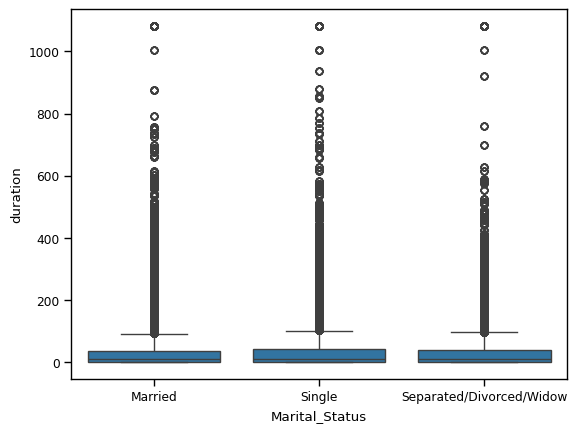

In [83]:
ax = sns.boxplot(data = df_master, x = 'Marital_Status', y = 'duration')

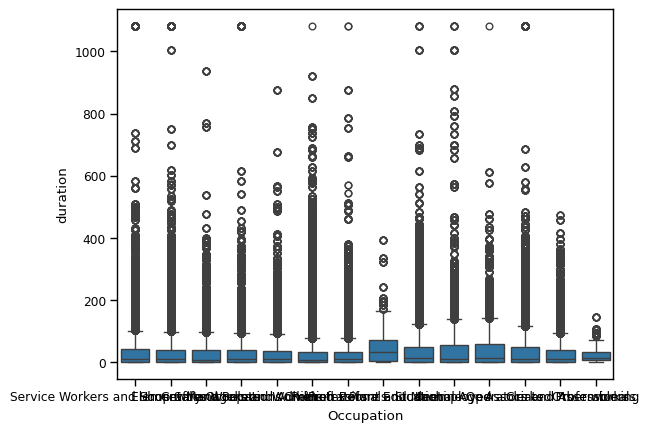

In [85]:
ax = sns.boxplot(data = df_master, x = 'Occupation', y = 'duration')

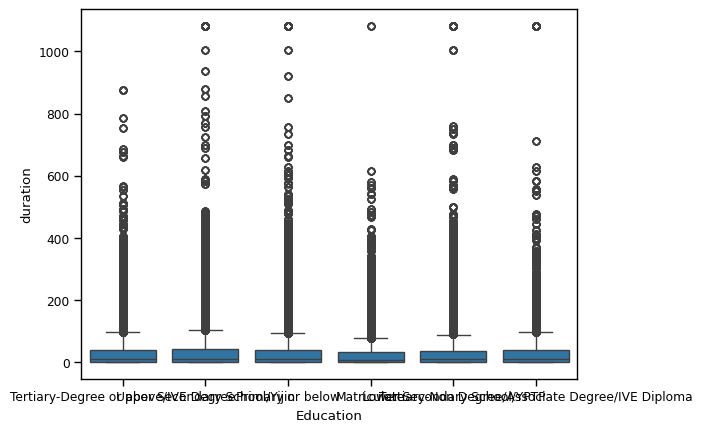

In [86]:
ax = sns.boxplot(data = df_master, x = 'Education', y = 'duration')

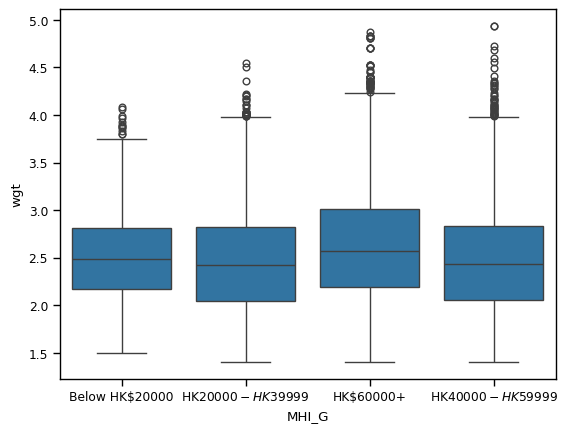

In [50]:
ax = sns.boxplot(data = DEM, x = 'MHI_G', y = 'wgt')

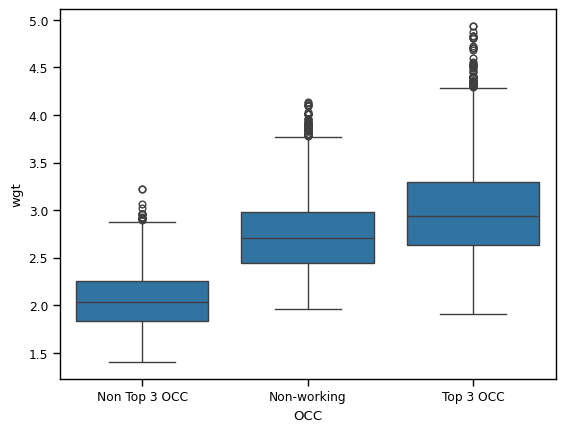

In [49]:
ax = sns.boxplot(data = DEM, x = 'OCC', y = 'wgt')

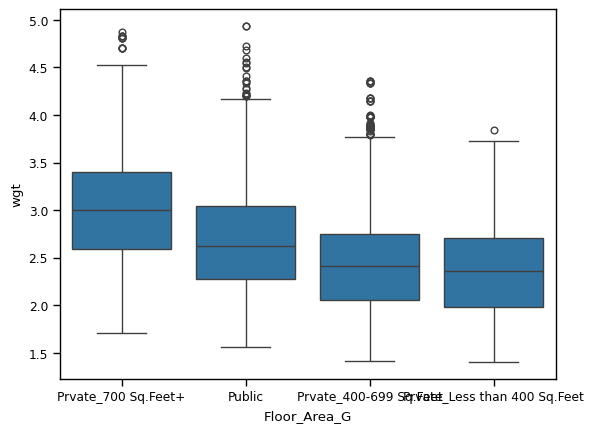

In [48]:
ax = sns.boxplot(data = DEM, x = 'Floor_Area_G', y = 'wgt')

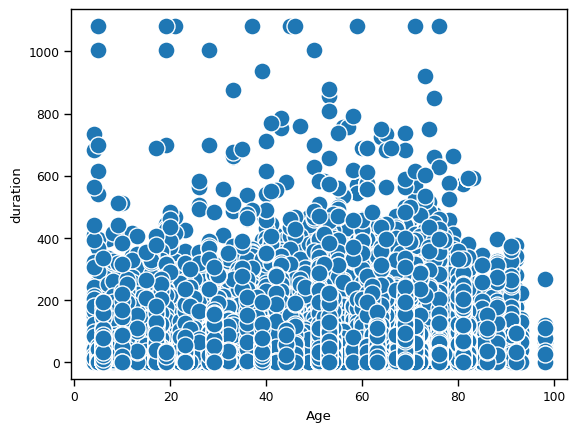

In [88]:
ax = sns.scatterplot(data = df_master,
                     x = 'Age',
                     y = 'duration',
                     markers = ['^','o'],
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [ ]:
y = DEM[['Default']]

In [ ]:
X = loan[['Income', 'Loan Amount']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234)

In [ ]:
X_train.shape, X_test.shape

## 4. Train and Evaluate the Classification Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [ ]:
model = classifier.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

## 5. Visualize the Classification Tree

In [ ]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model,
                   feature_names = list(X.columns),
                   class_names = ['No','Yes'],
                   filled = True);

In [ ]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

## 6. Prune the Classification Tree

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': range(1, 7)}

In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(X_train, y_train)

In [ ]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

In [ ]:
model_.score(X_train, y_train)

In [ ]:
model_.score(X_test, y_test)

In [ ]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_,
                   feature_names = list(X.columns),
                   class_names = ['No','Yes'],
                   filled = True);